In [20]:
import requests, json
import time

from datetime import datetime, timedelta

#parameters
api_key=""
headers = {
    "accept": "application/json",
    "Authorization": api_key
}
num_days = 30

In [21]:
sn_daily_burn = {}
sn_dail_burn_includeroot = {}
timestamps = []
counter =0 
#get the daily recycle for all subnets for the number of days (max is 200 with current api limits (we could loop if needed)
while counter <= max_subnet:

        
    url= f"https://api.taostats.io/api/subnet/history/v1?netuid={counter}&limit={num_days}&order=timestamp_desc"
    response = requests.get(url, headers=headers)
    resJson = json.loads(response.text)
    snHistoryData = resJson['data']
    sn_daily_burn[counter]=[]
    sn_dail_burn_includeroot[counter]=[]
    for historyData in snHistoryData:
        if counter ==0:
            #root subnet recycle is registrations + all emission
            burned_24 = float(historyData['recycled_24_hours'])/1e9 
            burned_24_root = float(historyData['recycled_24_hours'])/1e9 + float(historyData['emission'])/1e9*7200
            timestamps.append(historyData['timestamp'])
        else:
            burned_24 = float(historyData['recycled_24_hours'])/1e9
            burned_24_root = burned_24
        sn_daily_burn[counter].append(burned_24)
        sn_dail_burn_includeroot[counter].append(burned_24_root)
    counter +=1


In [22]:
#add up the subnet recycles to get a daily total.
#with root emission recyled and without

totals = [0]*num_days
totals_withroot = [0]*num_days
for sn, recycle in sn_daily_burn.items():
    for index, burn in enumerate(recycle):
        totals[index] += burn
for sn, recycle in sn_dail_burn_includeroot.items():
    for index, burn in enumerate(recycle):
        totals_withroot[index] += burn

totals = totals[::-1]
totals_withroot = totals_withroot[::-1]
timestamps=timestamps[::-1]
print(totals)

[332.4965487229999, 313.42120179899996, 313.731711731, 359.3514830590001, 283.844230927, 306.7839503939999, 287.64323791499993, 276.09517636600003, 260.70408875600003, 255.895788796, 191.58724849200001, 165.036914745, 170.96413133900006, 171.52552780099998, 240.30907151399995, 232.25466812000008, 204.80255120599995, 320.534199805, 320.6464634750001, 274.4504803169999, 317.19275471199995, 272.488842212, 271.067439519, 274.765346137, 267.59561208599996, 265.770598286, 269.39789706199986, 300.21107312899994, 302.63257215999994, 278.940933799]


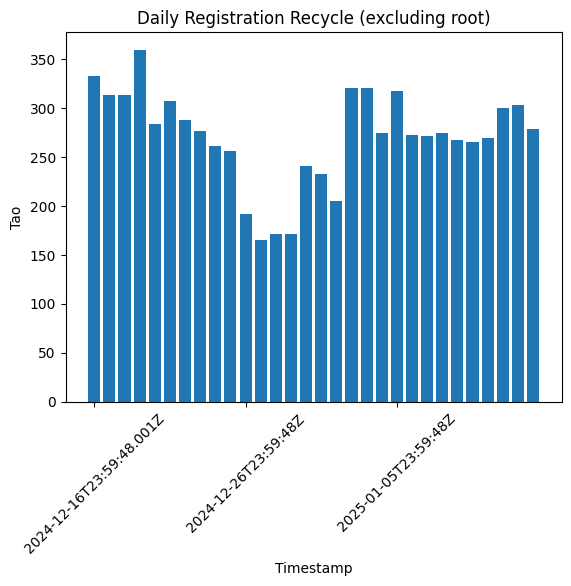

In [23]:
import matplotlib.pyplot as plt
import numpy as np


# create a figure and axis object
fig, ax = plt.subplots()

# plot the bar chart
ax.bar(timestamps, totals)

# set the x-axis ticks to display every 10th timestamp
ax.xaxis.set_ticks(timestamps[::10])

# rotate the x-axis labels for better readability
ax.tick_params(axis='x', labelrotation=45)

# set the title and labels
ax.set_title('Daily Registration Recycle (excluding root)')
ax.set_xlabel('Timestamp')
ax.set_ylabel('Tao')

# show the plot
plt.show()

In [24]:
import numpy as np

# assume Totals is a numpy array
totals = np.array(totals)  # your data here

# calculate statistics
max_total = np.max(totals)
min_total = np.min(totals)
avg_total = np.mean(totals)
std_total = np.std(totals)

# print the results
print(f'Maximum: {max_total:.2f}')
print(f'Minimum: {min_total:.2f}')
print(f'Average: {avg_total:.2f}')
print(f'Standard Deviation: {std_total:.2f}')

Maximum: 359.35
Minimum: 165.04
Average: 270.07
Standard Deviation: 48.50


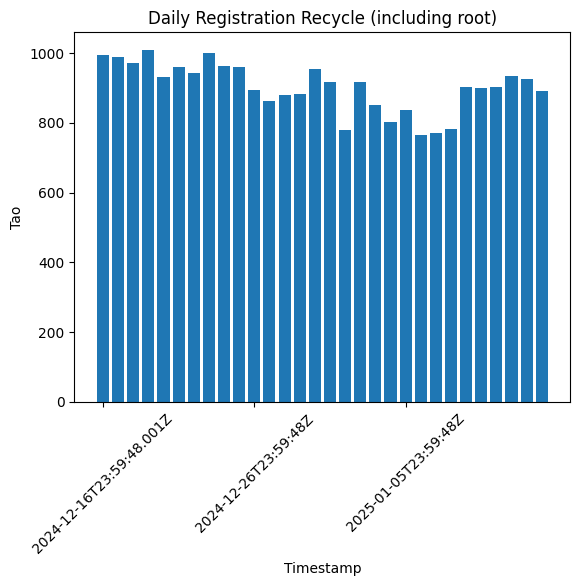

In [25]:
import matplotlib.pyplot as plt
import numpy as np


# create a figure and axis object
fig, ax = plt.subplots()

# plot the bar chart
ax.bar(timestamps, totals_withroot)

# set the x-axis ticks to display every 10th timestamp
ax.xaxis.set_ticks(timestamps[::10])

# rotate the x-axis labels for better readability
ax.tick_params(axis='x', labelrotation=45)

# set the title and labels
ax.set_title('Daily Registration Recycle (including root)')
ax.set_xlabel('Timestamp')
ax.set_ylabel('Tao')

# show the plot
plt.show()

In [26]:
import numpy as np

# assume Totals is a numpy array
root_totals = np.array(totals_withroot)  # your data here

# calculate statistics
root_max_total = np.max(root_totals)
root_min_total = np.min(root_totals)
root_avg_total = np.mean(root_totals)
root_std_total = np.std(root_totals)

# print the results
print(f'Maximum: {max_total:.2f}')
print(f'Minimum: {min_total:.2f}')
print(f'Average: {avg_total:.2f}')
print(f'Standard Deviation: {std_total:.2f}')

Maximum: 359.35
Minimum: 165.04
Average: 270.07
Standard Deviation: 48.50


In [27]:
# daily generation
#no root
daily_max = 7200- min_total
daily_avg = 7200 - avg_total
daily_min = 7200 - max_total
print(daily_min,daily_avg,daily_max)

#root
root_daily_max = 7200- root_min_total
root_daily_avg = 7200 - root_avg_total
root_daily_min = 7200 - root_max_total
print(root_daily_min,root_daily_avg,root_daily_max)

6840.648516941 6929.9286085206 7034.963085255
6190.877496941 6297.7872337206 6434.447208988


In [28]:
# get current circulating supply
url = "https://api.taostats.io/api/stats/latest/v1"
response = requests.get(url, headers=headers)
resJson = json.loads(response.text)
supply = float(resJson['data'][0]['issued'])/1e9

blocks_to_halve = 10500000-supply
print(supply,blocks_to_halve)

8170903.567643972 2329096.432356028


In [29]:
#days to halvening
#no root
days_min = blocks_to_halve/daily_max
days_avg = blocks_to_halve/daily_avg
days_max = blocks_to_halve/daily_min
print("days to halvening - no root")
print(days_min, days_avg, days_max)

#root
root_days_min = blocks_to_halve/root_daily_max
root_days_avg = blocks_to_halve/root_daily_avg
root_days_max = blocks_to_halve/root_daily_min
print("days to halvening -  root")
print(root_days_min, root_days_avg, root_days_max)

days to halvening - no root
331.07443552016935 336.09241363501474 340.4788926938689
days to halvening -  root
361.97304239323216 369.8277420178971 376.2142658301456


In [30]:
# get today's date
today = datetime.today()
# calculate the future dates
halvning_min= today + timedelta(days=days_min)
halvning_avg= today + timedelta(days=days_avg)
halvning_max= today + timedelta(days=days_max)

print(halvning_min.strftime("%Y-%m-%d"), halvning_avg.strftime("%Y-%m-%d"), halvning_max.strftime("%Y-%m-%d"))

#root
root_halvning_min= today + timedelta(days=root_days_min)
root_halvning_avg= today + timedelta(days=root_days_avg)
root_halvning_max= today + timedelta(days=root_days_max)

print(root_halvning_min.strftime("%Y-%m-%d"), root_halvning_avg.strftime("%Y-%m-%d"), root_halvning_max.strftime("%Y-%m-%d"))

2025-12-11 2025-12-16 2025-12-21
2026-01-11 2026-01-19 2026-01-25
